In [3]:
import pandas as pd
import numpy as np
datascience_df = pd.read_csv('/content/datascience_salaries 3.csv')
datascience_df.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
#Normalize the salary column using Min_Max_Scale
scalar = MinMaxScaler()
datascience_df['normal_salary'] = scalar.fit_transform(datascience_df[['salary']])
datascience_df.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary,normal_salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000,0.601010
1,2,Data scientist,Full Time,Senior,Boston,USD,120000,0.454545
2,3,Data scientist,Full Time,Senior,London,USD,68000,0.191919
3,4,Data scientist,Full Time,Senior,Boston,USD,120000,0.454545
4,5,Data scientist,Full Time,Senior,New York City,USD,149000,0.601010


In [6]:
#Implement dimensionality reduction on the dataset
!pip install scikit-learn


In [7]:
df = datascience_df.drop_duplicates()
df = datascience_df.drop(columns=['job_title'])
from sklearn.decomposition import PCA


In [8]:
numeric_cols = datascience_df.select_dtypes(include=['number']).columns
categorical_cols = datascience_df.select_dtypes(include=['object']).columns

from sklearn.decomposition import PCA

# Use datascience_df instead of df for get_dummies
df_encoded = pd.get_dummies(datascience_df, columns=categorical_cols)
print(df_encoded.head())

# Assuming you want to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_encoded)

   Unnamed: 0  salary  normal_salary  job_title_Big data  \
0           0  149000       0.601010               False   
1           2  120000       0.454545               False   
2           3   68000       0.191919               False   
3           4  120000       0.454545               False   
4           5  149000       0.601010               False   

   job_title_Data analyst  job_title_Data scientist  job_title_ML Ops  \
0                   False                      True             False   
1                   False                      True             False   
2                   False                      True             False   
3                   False                      True             False   
4                   False                      True             False   

   job_title_Machine learning  job_type_Full Time  job_type_Internship  ...  \
0                       False                True                False  ...   
1                       False             

In [9]:
agg_data = df.groupby('experience_level')['salary'].agg(['mean', 'median']).reset_index()

# Print the aggregated data
print(agg_data)

  experience_level          mean   median
0            Entry  36111.111111  30000.0
1        Executive  76076.923077  46000.0
2              Mid  51786.885246  51000.0
3           Senior  75088.033012  68000.0


Daily Challenge Day 5:
This dataset contains two sets of data: structured and unstructured.

Structured: Salary, Experience Level, Employmenty Type, work year,  company size, remote ratio
Unstructured: Job Title

In [10]:
#Handling missing values
missing_values = datascience_df.isnull().sum()
print(missing_values)

Unnamed: 0          0
job_title           0
job_type            0
experience_level    0
location            0
salary_currency     0
salary              0
normal_salary       0
dtype: int64


In [10]:
#This shows that there aren't any missing values in ithe csv files.

In [12]:
#Performing a group wise analysis of salary based on experience level:
agg_data = df.groupby('experience_level')['salary'].agg(['mean', 'median']).reset_index().round(2)

# Print the aggregated data
print(agg_data)

  experience_level      mean   median
0            Entry  36111.11  30000.0
1        Executive  76076.92  46000.0
2              Mid  51786.89  51000.0
3           Senior  75088.03  68000.0


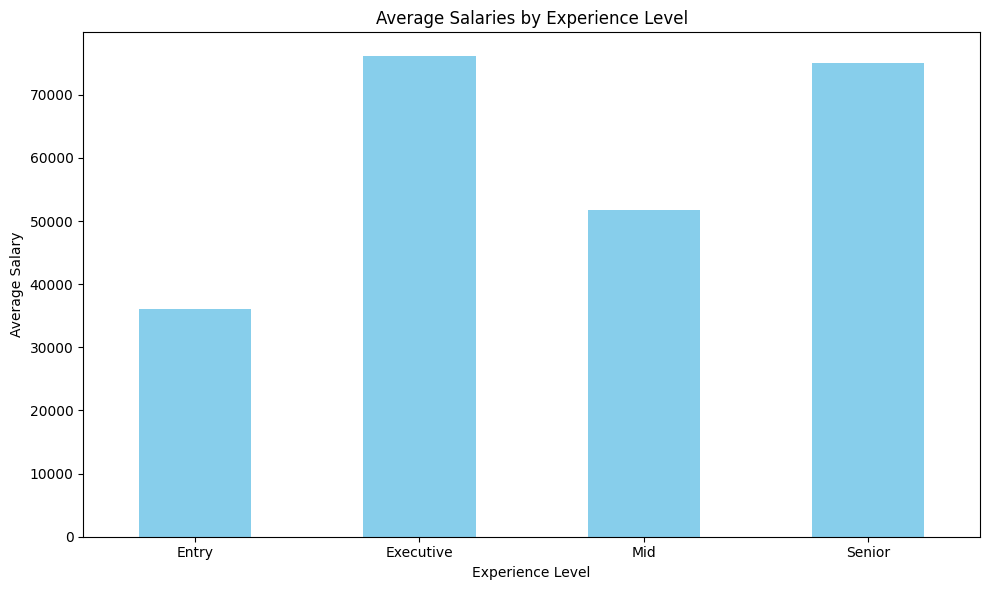

In [15]:
import matplotlib.pyplot as plt

# Calculate average salaries by experience level
avg_salaries = datascience_df.groupby('experience_level')['salary'].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
avg_salaries.plot(kind='bar', color='skyblue')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.title('Average Salaries by Experience Level')
plt.tight_layout()
plt.show()